# AE with DSA dataset(Encoder == Decoder)
______
## 1. 데이터 불러오기

In [15]:
import pandas as pd

df = pd.read_csv(r"C:\Users\DoHyeonjik\GachonUniv\3-2\datasets\DL\DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [16]:
# 구조 보기
df.shape

(9120, 272)

In [17]:
# activity 클래스 확인
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

## 2. 데이터 전처리

In [18]:
lyingRigh_df = df[df.activity == 'lyingRigh']
lyingBack_df = df[df.activity == 'lyingBack']
runningTreadmill_df = df[df.activity == 'runningTreadmill']

normal_data = pd.concat([lyingRigh_df, lyingBack_df], axis=0)
abnormal_data = runningTreadmill_df

In [19]:
print(normal_data.shape)
print(abnormal_data.shape)

(960, 272)
(480, 272)


In [20]:
# train 데이터는 normal data/ test데이터는 normal + abnormal
import numpy as np

x_train = normal_data
x_test = pd.concat([normal_data, abnormal_data], axis=0)

In [21]:
print(x_train.shape, x_test.shape)

(960, 272) (1440, 272)


In [22]:
# train 데이터는 label 필요없음
x_train = x_train.drop(['people', 'activity'], axis=1)
y_test = x_test['activity']
x_test = x_test.drop(['people', 'activity'], axis=1)

print(x_train.shape)
print(x_test.shape, y_test.shape)

(960, 270)
(1440, 270) (1440,)


In [23]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)


## 3. 모델 생성 및 학습
### 3-1) Encoder = Decoder

In [24]:
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model

input_dim= train_scaled.shape[1] # 270

# 첫번째 모델 : 인코더와 디코더의 구조가 동
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

AE = Model(inputs = input_layer, outputs= decoded)
AE.compile(optimizer='adam', loss='mse')

AE.summary()




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          34,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 270)                 │          17,550 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,742 (256.80 KB)

 Trainable params: 65,742 (256.80 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#첫번쨰 모델 훈련
history1 = AE.fit(train_scaled, train_scaled, epochs=50, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 1.3220 - val_loss: 0.7069
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2544 - val_loss: 0.6989
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2510 - val_loss: 0.6848
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1626 - val_loss: 0.6607
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1296 - val_loss: 0.6269
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0014 - val_loss: 0.5892
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9766 - val_loss: 0.5565
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9091 - val_loss: 0.5352
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9070 - val_loss: 0.5228
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8855 - val_loss: 0.5152
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1284 - val_loss: 0.5095
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0709 - val_loss: 0.4967
E

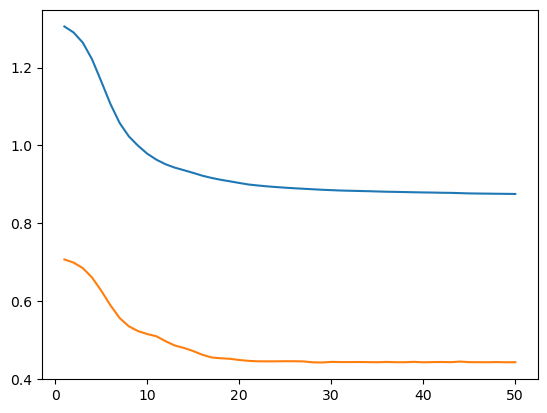

In [26]:
# 첫번쨰 모델의 loss 확인
import matplotlib.pyplot as plt

epochs = range(1,51)
plt.plot(epochs, history1.history['loss'])
plt.plot(epochs, history1.history['val_loss'])
plt.show()

In [27]:
# test 데이터를 AE에 넣고 Reconstruction error 구하기
predictions = AE.predict(test_scaled)
mse = np.mean(np.power(test_scaled - predictions, 2), axis=1)
error_df1 = pd.DataFrame({"reconstruction_error": mse, "true_class": y_test})

error_df1.describe()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error
count,1.440000e+03
mean,1.203285e+06
std,1.853102e+06
min,1.494875e-01
25%,3.265870e-01
50%,4.502692e-01
75%,2.727179e+06
max,8.157059e+06


In [51]:
# 잘못 정렬된 인덱스 조정
## 기존 DSA 데이터에서 불러오면서 생긴 index 때문에 lying은 1440번부터
## Running은 5280번 부터 인덱스가 매겨져있음
## 인덱스 shuffle 도 수행
error_df1 = error_df1.sample(frac=1).reset_index(drop=True)
error_df1.tail()

,reconstruction_error,true_class
1435,4.633491e+06,runningTreadmill
1436,1.738378e-01,lyingBack
1437,3.801661e+06,runningTreadmill
1438,3.455813e-01,lyingRigh
1439,2.514740e+06,runningTreadmill


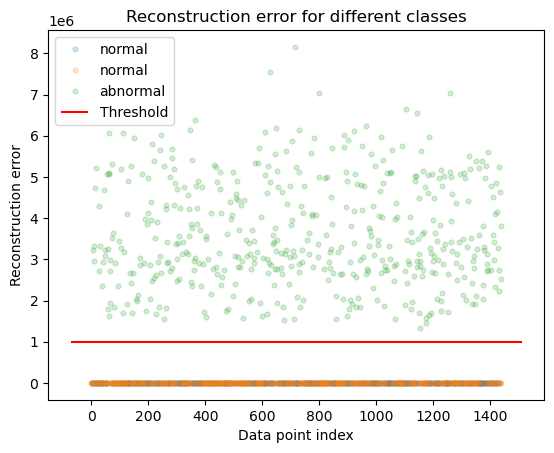

In [52]:
threshold=1e6-1

groups = error_df1.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms =3.5, linestyle='',alpha=0.2,
            label= "abnormal" if name == "runningTreadmill" else "normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Threshold")
ax.legend()
plt.title("Reconstruction error for different classes")
plt.xlabel("Data point index")
plt.ylabel("Reconstruction error")
plt.show()
          